<p align="center">
  <img src="../data/big_four.png">
</p>


# TenisStadistics

## Importamos librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import requests, json, numpy as np
import time
import sys

pd.set_option("display.max_columns", None)

## Primer dataset 
### CSV con los resultados de los partidos del circuito ATP desde el año 2000

#### Carga de datos

In [7]:
sys.path.append("../")
dfResultados = pd.read_csv("../data/raw/atp_tennis.csv", sep=";")
dfResultados.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,03/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,03/01/2000,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,03/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,03/01/2000,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,03/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


In [8]:
dfResultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60325 entries, 0 to 60324
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tournament  60325 non-null  object
 1   Date        60325 non-null  object
 2   Series      60325 non-null  object
 3   Court       60325 non-null  object
 4   Surface     60325 non-null  object
 5   Round       60325 non-null  object
 6   Best of     60325 non-null  int64 
 7   Player_1    60325 non-null  object
 8   Player_2    60325 non-null  object
 9   Winner      60325 non-null  object
 10  Rank_1      60325 non-null  int64 
 11  Rank_2      60325 non-null  int64 
 12  Pts_1       60325 non-null  int64 
 13  Pts_2       60325 non-null  int64 
 14  Odd_1       60325 non-null  object
 15  Odd_2       60325 non-null  object
 16  Score       60325 non-null  object
dtypes: int64(5), object(12)
memory usage: 7.8+ MB


In [9]:
dfResultados.describe().round(2)

,Best of,Rank_1,Rank_2,Pts_1,Pts_2
count,60325.00,60325.00,60325.00,60325.00,60325.00
mean,3.38,75.92,75.65,1083.27,1090.67
std,0.78,100.77,101.73,1704.84,1730.70
min,3.00,-1.00,-1.00,-1.00,-1.00
25%,3.00,25.00,24.00,-1.00,-1.00
50%,3.00,54.00,54.00,664.00,665.00
75%,3.00,92.00,92.00,1195.00,1205.00
max,5.00,3390.00,4915.00,16950.00,16950.00


In [10]:
dfResultados.shape

(60325, 17)

#### Primer análisis de la información

In [11]:
dfResultados.isna().sum()/len(dfResultados) *100 

Tournament    0.0
Date          0.0
Series        0.0
Court         0.0
Surface       0.0
Round         0.0
Best of       0.0
Player_1      0.0
Player_2      0.0
Winner        0.0
Rank_1        0.0
Rank_2        0.0
Pts_1         0.0
Pts_2         0.0
Odd_1         0.0
Odd_2         0.0
Score         0.0
dtype: float64

Como no hay ningún valor NaN, no es necesario aplicar ningún tratamiento

### Preparación de datos

In [12]:
#Eliminamos las columnas que no vamos a utilizar
dfResultados.drop(["Odd_1", "Odd_2", "Pts_1", "Pts_2"], axis=1, inplace=True)

#Convertimos el campo "Date" a tipo Date para un mejor tratamiento
dfResultados['Date'] = pd.to_datetime(dfResultados['Date'], format='%d/%m/%Y')
dfResultados

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,7-6 5-7 6-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60320,Stuttgart Open,2023-06-16,ATP250,Outdoor,Grass,Quarterfinals,3,Hurkacz H.,O Connell C.,Hurkacz H.,14,74,6-4 6-4
60321,Stuttgart Open,2023-06-16,ATP250,Outdoor,Grass,Quarterfinals,3,Gasquet R.,Struff J.L.,Struff J.L.,55,24,4-6 5-7
60322,Stuttgart Open,2023-06-17,ATP250,Outdoor,Grass,Semifinals,3,Tiafoe F.,Fucsovics M.,Tiafoe F.,12,86,6-3 7-6
60323,Stuttgart Open,2023-06-17,ATP250,Outdoor,Grass,Semifinals,3,Hurkacz H.,Struff J.L.,Struff J.L.,14,24,6-3 3-6 3-6


In [13]:
df2023 = dfResultados[dfResultados["Date"].dt.year == 2023].reset_index()
df2023.head()

,index,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Score
0,58955,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3,Gasquet R.,Giron M.,Giron M.,68,61,6-7 7-6 5-7
1,58956,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Kecmanovic M.,O Connell C.,Kecmanovic M.,29,78,6-4 6-4
2,58957,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Rune H.,Nishioka Y.,Nishioka Y.,11,36,6-2 4-6 4-6
3,58958,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Popyrin A.,Auger-Aliassime F.,Popyrin A.,120,6,6-4 7-6
4,58959,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Thompson J.,Halys Q.,Halys Q.,84,64,3-6 4-6


In [14]:
torneos = ['Grand Slam', "Masters Cup", 'Masters 1000']
df_torneos = df2023[df2023["Series"].isin(torneos)]

df_torneos["Sets_Played"] = df_torneos["Score"].str.count("-")
df_torneos["Tie_Breaks"] = df_torneos["Score"].str.count("7-6") + df_torneos["Score"].str.count("6-7")
df_torneos.set_index("index", inplace=True)
df_torneos.head()

C:\Users\jaime\AppData\Local\Temp\ipykernel_19752\1898467528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_torneos["Sets_Played"] = df_torneos["Score"].str.count("-")
C:\Users\jaime\AppData\Local\Temp\ipykernel_19752\1898467528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_torneos["Tie_Breaks"] = df_torneos["Score"].str.count("7-6") + df_torneos["Score"].str.count("6-7")


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Score,Sets_Played,Tie_Breaks
index,,,,,,,,,,,,,,,
59060,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Moutet C.,Wu Y.,Moutet C.,62,114,6-4 5-7 6-2 4-6 7-5,5,0
59061,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Rinderknech A.,Watanuki Y.,Watanuki Y.,59,138,3-6 3-6 2-6,3,0
59062,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Van De Zandschulp B.,Ivashka I.,Van De Zandschulp B.,34,73,6-3 3-6 7-5 6-3,4,0
59063,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Barrere G.,Etcheverry T.,Etcheverry T.,83,79,6-3 3-6 4-6 4-6,4,0
59064,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Sinner J.,Edmund K.,Sinner J.,16,581,6-4 6-0 6-2,3,0


In [17]:
df_torneos.to_csv(r"../data/final/atp_tennis_final.csv")

### Descripción de columnas de dataframe
| Columnas | Descripción |
|----------|----------|
| Tournament | Nombre del torneo
|Date|Fecha del partido
|Series|Categoría del torneo
|Court|Si se juega en interior o exterior
|Surface|Tipo de superficie donde se juega el torneo
|Best of|Al mejor de que sets se juega
|Player_1|Jugador 1
|Player_2|Jugador 2
|Winner|Ganador del partido
|Rank_1|Ranking del jugador 1 al comienzo de ese torneo
|Rank_2|Ranking del jugador 2 al comienzo de ese torneo
|Score|Puntuación del partido
|Sets_Played|Número de sets jugados
|Tie_Breaks|Número de Tie-Breaks del partido

### Análisis univariante

In [18]:
df_torneos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 59060 to 60272
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tournament   666 non-null    object        
 1   Date         666 non-null    datetime64[ns]
 2   Series       666 non-null    object        
 3   Court        666 non-null    object        
 4   Surface      666 non-null    object        
 5   Round        666 non-null    object        
 6   Best of      666 non-null    int64         
 7   Player_1     666 non-null    object        
 8   Player_2     666 non-null    object        
 9   Winner       666 non-null    object        
 10  Rank_1       666 non-null    int64         
 11  Rank_2       666 non-null    int64         
 12  Score        666 non-null    object        
 13  Sets_Played  666 non-null    int64         
 14  Tie_Breaks   666 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 

In [19]:
df_torneos.describe(include="int64").round(2)

,Best of,Rank_1,Rank_2,Sets_Played,Tie_Breaks
count,666.00,666.00,666.00,666.00,666.00
mean,3.74,66.39,67.30,2.89,0.53
std,0.97,72.60,88.06,0.93,0.71
min,3.00,1.00,1.00,2.00,0.00
25%,3.00,18.00,19.00,2.00,0.00
50%,3.00,54.00,49.00,3.00,0.00
75%,5.00,92.00,87.00,3.00,1.00
max,5.00,675.00,894.00,5.00,3.00


In [20]:
for i in df_torneos.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df_torneos[i].nunique()/df_torneos.shape[0])*100:.2f}%")

La cardinalidad de la variable Tournament es 1.05%
La cardinalidad de la variable Series es 0.30%
La cardinalidad de la variable Court es 0.15%
La cardinalidad de la variable Surface es 0.30%
La cardinalidad de la variable Round es 1.05%
La cardinalidad de la variable Player_1 es 23.72%
La cardinalidad de la variable Player_2 es 22.37%
La cardinalidad de la variable Winner es 19.82%
La cardinalidad de la variable Score es 66.37%


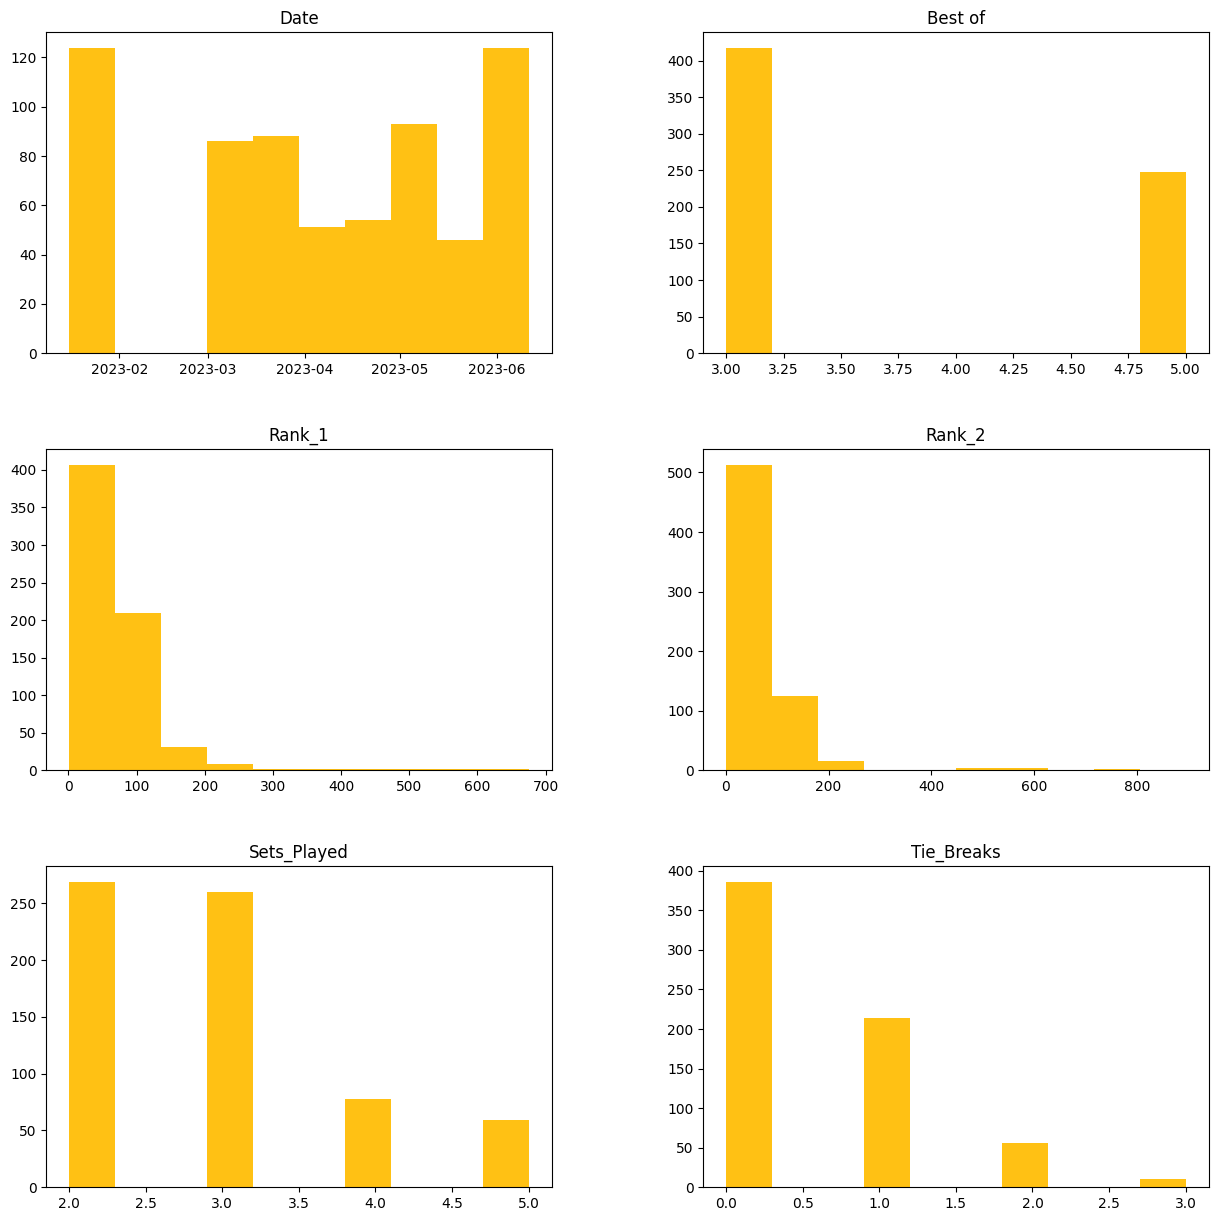

In [21]:
color = "#FFC114"
df_torneos.hist(figsize=(15,15),grid=False,color=color);

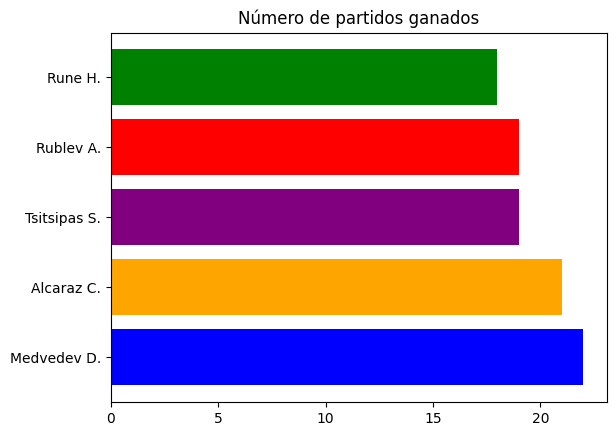

In [22]:
#Número de partidos ganados en total
winners = df_torneos.groupby("Winner").count().sort_values("Series", ascending=False).head(5).index
victorias = df_torneos.groupby("Winner").count().sort_values("Series", ascending=False).head(5)["Series"]

color = ['blue', 'orange', 'purple', 'red', 'green']

plt.barh(winners, victorias, color=color)
plt.title("Número de partidos ganados")
plt.show()

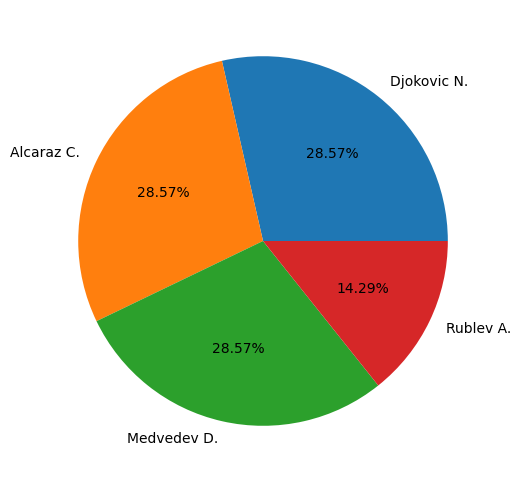

In [23]:
df_Finales = df_torneos[df_torneos["Round"] == "The Final"]
ganaFinal = df_Finales["Winner"].value_counts()
plt.figure(figsize = (6,6))
plt.pie(ganaFinal.values,
       labels = ganaFinal.index,
       autopct='%1.2f%%');


### Análisis multivariante

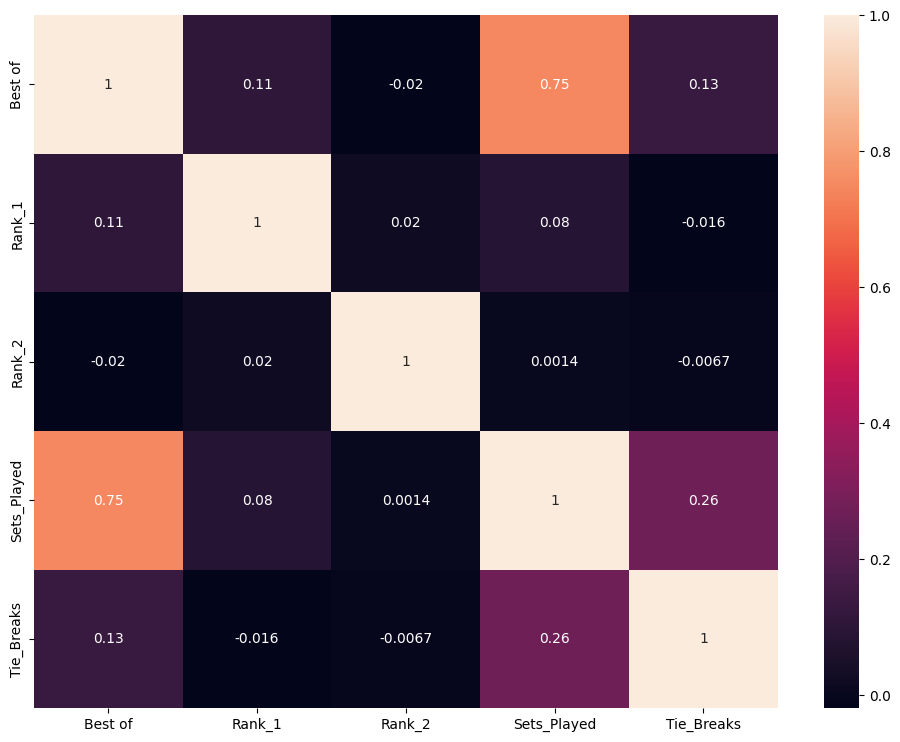

In [24]:
plt.figure(figsize=(12,9))
sns.heatmap(df_torneos.corr(numeric_only=True), annot=True);

## Segundo dataset 
### API que contiene estadísticas de jugadores

### Carga de datos

In [62]:
url = "https://ultimate-tennis1.p.rapidapi.com/live_leaderboard/50"

headers = {
	"X-RapidAPI-Key": "0b00932e03msh9c0e6292431999cp102f2cjsnfaa91f7ec449",
	"X-RapidAPI-Host": "ultimate-tennis1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

todos = json.loads(response.text)

players = pd.DataFrame(todos["data"])

In [63]:
ids = players[["Name","id"]]

In [66]:
dfStats = pd.DataFrame()

for i in range(len(ids)):
	id = ids.iloc[i]["id"]
	name = ids.iloc[i]["Name"]
	# print(id, name)
	url = (f"https://ultimate-tennis1.p.rapidapi.com/player_stats/atp/{id}/2023/all")

	headers = {
		"X-RapidAPI-Key": "0b00932e03msh9c0e6292431999cp102f2cjsnfaa91f7ec449",
		"X-RapidAPI-Host": "ultimate-tennis1.p.rapidapi.com"
	}

	response = requests.get(url, headers=headers)

	playerStats = json.loads(response.text)

	data1 = pd.DataFrame(playerStats["player_data"]).head()
	# print(data1)

	name = pd.DataFrame([name], columns=["Name"])
	conc = pd.concat([name, data1], axis=1)
	dfStats = pd.concat([dfStats, conc], ignore_index=True)
	time.sleep(5)
dfStats.head()

d643 Novak Djokovic
a0e2 Carlos Alcaraz
mm58 Daniil Medvedev
s0ag Jannik Sinner
re44 Andrey Rublev
te51 Stefanos Tsitsipas
z355 Alexander Zverev
r0dg Holger Rune
hb71 Hubert Hurkacz
fb98 Taylor Fritz
rh16 Casper Ruud
dh58 Alex de Minaur
pl56 Tommy Paul
d875 Grigor Dimitrov
ke29 Karen Khachanov
td51 Frances Tiafoe
s0s1 Ben Shelton
n771 Cameron Norrie
j551 Nicolas Jarry
hh26 Ugo Humbert
c0au Francisco Cerundolo
me82 Adrian Mannarino
gj37 Tallon Griekspoor
k0ah Sebastian Korda
sl28 Jan-Lennard Struff
dh50 Alejandro Davidovich Fokina
m0ej Lorenzo Musetti
b0bi Sebastian Baez
ag37 Felix Auger-Aliassime
ea24 Tomas Martin Etcheverry
l0bv Jiri Lehecka
bk92 Alexander Bublik
db63 Laslo Djere
e865 Christopher Eubanks
kc56 Aslan Karatsev
f0f1 Arthur Fils
cg80 Borna Coric
e687 Daniel Evans
sx50 Roman Safiullin
p09z Alexei Popyrin
mk66 Mackenzie McDonald
mc10 Andy Murray
o513 Sebastian Ofner
a0fc Matteo Arnaldi
ph71 Max Purcell
su87 Lorenzo Sonego
n732 Yoshihito Nishioka
s0h2 Alexander Shevchenko
w36

,Name,1st Serve,1st Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won,Return Points Won,Service Games Played,Service Games Won,Total Points Won,Total Service Points Won
0,Novak Djokovic,64%,76%,33%,58%,54%,383,42%,261,491,67%,157,721,29%,41%,741,88%,55%,70%
1,Carlos Alcaraz,66%,72%,35%,56%,54%,302,40%,369,691,65%,161,874,32%,42%,881,85%,54%,67%
2,Daniil Medvedev,64%,75%,34%,50%,54%,547,46%,419,622,67%,314,922,31%,41%,923,85%,54%,66%
3,Jannik Sinner,60%,76%,33%,57%,54%,436,42%,368,615,69%,129,892,29%,41%,901,87%,54%,68%
4,Andrey Rublev,61%,75%,30%,51%,52%,616,39%,439,639,63%,156,"1,029",24%,38%,"1,038",84%,52%,66%
5,Stefanos Tsitsipas,64%,78%,27%,55%,49%,547,39%,312,469,66%,153,926,20%,35%,942,89%,52%,70%
6,Alexander Zverev,71%,74%,29%,50%,52%,613,37%,406,618,64%,222,970,23%,38%,964,85%,52%,67%
7,Holger Rune,62%,72%,29%,53%,49%,359,39%,395,453,64%,259,830,21%,37%,833,83%,51%,65%
8,Hubert Hurkacz,64%,80%,27%,51%,46%,"1,031",35%,334,460,64%,133,985,16%,34%,999,88%,51%,69%
9,Taylor Fritz,59%,79%,28%,55%,53%,692,42%,352,490,66%,165,909,23%,38%,935,87%,53%,69%


### Primer análisis

In [67]:
dfStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   1st Serve                    50 non-null     object
 2   1st Serve Points Won         50 non-null     object
 3   1st Serve Return Points Won  50 non-null     object
 4   2nd Serve Points Won         50 non-null     object
 5   2nd Serve Return Points Won  50 non-null     object
 6   Aces                         50 non-null     object
 7   Break Points Converted       50 non-null     object
 8   Break Points Faced           50 non-null     object
 9   Break Points Opportunities   50 non-null     object
 10  Break Points Saved           50 non-null     object
 11  Double Faults                50 non-null     object
 12  Return Games Played          50 non-null     object
 13  Return Games Won             50 non-n

In [68]:
dfStats.describe()

,Name,1st Serve,1st Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won,Return Points Won,Service Games Played,Service Games Won,Total Points Won,Total Service Points Won
count,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
unique,50,14,14,12,12,11,46,14,44,48,13,46,47,17,12,49,17,8,10
top,Novak Djokovic,64%,72%,27%,51%,51%,362,41%,335,303,65%,212,530,20%,38%,764,84%,50%,65%
freq,1,9,7,10,9,10,2,8,2,2,6,2,2,6,11,2,6,17,11


### Preparación de los datos

In [86]:
dfStats = dfStats.set_axis(["Player Name", "First serve", "First Serve Points Won", "1st Serve Return Points Won", "2nd Serve Points Won","2nd Serve Return Points Won",
                            "Aces","Break Points Converted", "Break Points Faced", "Break Points Opportunities", "Break Points Saved", "Double Faults",
                            "Return Games Played", "Return Games Won %", "Return Points Won", "Service Games Played", "Service Games Won %", "Total Points Won",
                            "Total Service Points Won"], axis=1)
dfStats.head()

ValueError: Length mismatch: Expected axis has 23 elements, new values have 19 elements

In [ ]:
dfStats['First serve'] = dfStats['First serve'].str.rstrip('%').astype('float') / 100.0
dfStats['First Serve Points Won'] = dfStats['First Serve Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats['2nd Serve Points Won'] = dfStats['2nd Serve Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats['Break Points Converted'] = dfStats['Break Points Converted'].str.rstrip('%').astype('float') / 100.0
dfStats['Break Points Saved'] = dfStats['Break Points Saved'].str.rstrip('%').astype('float') / 100.0
dfStats['Return Games Won %'] = dfStats['Return Games Won %'].str.rstrip('%').astype('float') / 100.0
dfStats['Return Points Won'] = dfStats['Return Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats['Service Games Won %'] = dfStats['Service Games Won %'].str.rstrip('%').astype('float') / 100.0
dfStats['Total Service Points Won'] = dfStats['Total Service Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats['Total Points Won'] = dfStats['Total Points Won'].str.rstrip('%').astype('float') / 100.0
dfStats.head()

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,0.67,157,721,0.29,0.41,741,0.88,0.55,0.70
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,0.65,161,874,0.32,0.42,881,0.85,0.54,0.67
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,0.67,314,922,0.31,0.41,923,0.85,0.54,0.66
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,0.69,129,892,0.29,0.41,901,0.87,0.54,0.68
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,0.63,156,"1,029",0.24,0.38,"1,038",0.84,0.52,0.66
5,Stefanos Tsitsipas,0.64,0.78,27%,0.55,49%,547,0.39,312,469,0.66,153,926,0.20,0.35,942,0.89,0.52,0.70
6,Alexander Zverev,0.71,0.74,29%,0.50,52%,613,0.37,406,618,0.64,222,970,0.23,0.38,964,0.85,0.52,0.67
7,Holger Rune,0.62,0.72,29%,0.53,49%,359,0.39,395,453,0.64,259,830,0.21,0.37,833,0.83,0.51,0.65
8,Hubert Hurkacz,0.64,0.80,27%,0.51,46%,"1,031",0.35,334,460,0.64,133,985,0.16,0.34,999,0.88,0.51,0.69
9,Taylor Fritz,0.59,0.79,28%,0.55,53%,692,0.42,352,490,0.66,165,909,0.23,0.38,935,0.87,0.53,0.69


In [ ]:
dfStats['Aces'] = dfStats['Aces'].str.replace(",","")
dfStats['Aces'] = dfStats['Aces'].astype("int64")
dfStats['Break Points Faced'] = dfStats['Break Points Faced'].astype("int64")
dfStats['Double Faults'] = dfStats['Double Faults'].astype("int64")
dfStats['Break Points Opportunities'] = dfStats['Break Points Opportunities'].astype("int64")
dfStats['Service Games Played'] = dfStats['Service Games Played'].str.replace(",","")
dfStats['Service Games Played'] = dfStats['Service Games Played'].astype("int64")
dfStats['Return Games Played'] = dfStats['Return Games Played'].str.replace(",","")
dfStats['Return Games Played'] = dfStats['Return Games Played'].astype("int64")
dfStats.head()

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,0.67,157,721,0.29,0.41,741,0.88,0.55,0.70
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,0.65,161,874,0.32,0.42,881,0.85,0.54,0.67
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,0.67,314,922,0.31,0.41,923,0.85,0.54,0.66
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,0.69,129,892,0.29,0.41,901,0.87,0.54,0.68
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,0.63,156,1029,0.24,0.38,1038,0.84,0.52,0.66
5,Stefanos Tsitsipas,0.64,0.78,27%,0.55,49%,547,0.39,312,469,0.66,153,926,0.20,0.35,942,0.89,0.52,0.70
6,Alexander Zverev,0.71,0.74,29%,0.50,52%,613,0.37,406,618,0.64,222,970,0.23,0.38,964,0.85,0.52,0.67
7,Holger Rune,0.62,0.72,29%,0.53,49%,359,0.39,395,453,0.64,259,830,0.21,0.37,833,0.83,0.51,0.65
8,Hubert Hurkacz,0.64,0.80,27%,0.51,46%,1031,0.35,334,460,0.64,133,985,0.16,0.34,999,0.88,0.51,0.69
9,Taylor Fritz,0.59,0.79,28%,0.55,53%,692,0.42,352,490,0.66,165,909,0.23,0.38,935,0.87,0.53,0.69


In [ ]:
dfStats["BreakPoints Won"] = (dfStats["Break Points Faced"] * dfStats["Break Points Converted"]).round()
dfStats["BreakPoints Saved"] = (dfStats["Break Points Opportunities"] * dfStats["Break Points Saved"]).round()
dfStats["Return Games Won"] = (dfStats["Return Games Played"] * dfStats["Return Games Won %"]).round()
dfStats["Service Games Won"] = (dfStats["Service Games Played"] * dfStats["Service Games Won %"]).round()
dfStats.head()

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won,BreakPoints Won,BreakPoints Saved,Return Games Won,Service Games Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,0.67,157,721,0.29,0.41,741,0.88,0.55,0.70,110.0,329.0,209.0,652.0
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,0.65,161,874,0.32,0.42,881,0.85,0.54,0.67,148.0,449.0,280.0,749.0
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,0.67,314,922,0.31,0.41,923,0.85,0.54,0.66,193.0,417.0,286.0,785.0
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,0.69,129,892,0.29,0.41,901,0.87,0.54,0.68,155.0,424.0,259.0,784.0
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,0.63,156,1029,0.24,0.38,1038,0.84,0.52,0.66,171.0,403.0,247.0,872.0
5,Stefanos Tsitsipas,0.64,0.78,27%,0.55,49%,547,0.39,312,469,0.66,153,926,0.20,0.35,942,0.89,0.52,0.70,122.0,310.0,185.0,838.0
6,Alexander Zverev,0.71,0.74,29%,0.50,52%,613,0.37,406,618,0.64,222,970,0.23,0.38,964,0.85,0.52,0.67,150.0,396.0,223.0,819.0
7,Holger Rune,0.62,0.72,29%,0.53,49%,359,0.39,395,453,0.64,259,830,0.21,0.37,833,0.83,0.51,0.65,154.0,290.0,174.0,691.0
8,Hubert Hurkacz,0.64,0.80,27%,0.51,46%,1031,0.35,334,460,0.64,133,985,0.16,0.34,999,0.88,0.51,0.69,117.0,294.0,158.0,879.0
9,Taylor Fritz,0.59,0.79,28%,0.55,53%,692,0.42,352,490,0.66,165,909,0.23,0.38,935,0.87,0.53,0.69,148.0,323.0,209.0,813.0


### Análisis univariante

In [87]:
dfStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  50 non-null     object 
 1   First serve                  50 non-null     float64
 2   First Serve Points Won       50 non-null     float64
 3   1st Serve Return Points Won  50 non-null     object 
 4   2nd Serve Points Won         50 non-null     float64
 5   2nd Serve Return Points Won  50 non-null     object 
 6   Aces                         50 non-null     int64  
 7   Break Points Converted       50 non-null     float64
 8   Break Points Faced           50 non-null     int64  
 9   Break Points Opportunities   50 non-null     int64  
 10  Break Points Saved           50 non-null     float64
 11  Double Faults                50 non-null     int64  
 12  Return Games Played          50 non-null     int64  
 13  Return Games Won %    

In [88]:
dfStats.head()

,Player Name,First serve,First Serve Points Won,1st Serve Return Points Won,2nd Serve Points Won,2nd Serve Return Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won,BreakPoints Won,BreakPoints Saved,Return Games Won,Service Games Won
0,Novak Djokovic,0.64,0.76,33%,0.58,54%,383,0.42,261,491,0.67,157,721,0.29,0.41,741,0.88,0.55,0.70,110.0,329.0,209.0,652.0
1,Carlos Alcaraz,0.66,0.72,35%,0.56,54%,302,0.40,369,691,0.65,161,874,0.32,0.42,881,0.85,0.54,0.67,148.0,449.0,280.0,749.0
2,Daniil Medvedev,0.64,0.75,34%,0.50,54%,547,0.46,419,622,0.67,314,922,0.31,0.41,923,0.85,0.54,0.66,193.0,417.0,286.0,785.0
3,Jannik Sinner,0.60,0.76,33%,0.57,54%,436,0.42,368,615,0.69,129,892,0.29,0.41,901,0.87,0.54,0.68,155.0,424.0,259.0,784.0
4,Andrey Rublev,0.61,0.75,30%,0.51,52%,616,0.39,439,639,0.63,156,1029,0.24,0.38,1038,0.84,0.52,0.66,171.0,403.0,247.0,872.0


In [ ]:
for i in dfStats.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(dfStats[i].nunique()/dfStats.shape[0])*100:.2f}%")

La cardinalidad de la variable Player Name es 100.00%
La cardinalidad de la variable 1st Serve Return Points Won es 24.00%
La cardinalidad de la variable 2nd Serve Return Points Won es 22.00%


In [ ]:
for i in dfStats.select_dtypes(include=["int64", "float64"]):
    print(f"La cardinalidad de la variable {i} es {(dfStats[i].nunique()/dfStats.shape[0])*100:.2f}%")

La cardinalidad de la variable First serve es 28.00%
La cardinalidad de la variable First Serve Points Won es 28.00%
La cardinalidad de la variable 2nd Serve Points Won es 24.00%
La cardinalidad de la variable Aces es 92.00%
La cardinalidad de la variable Break Points Converted es 28.00%
La cardinalidad de la variable Break Points Faced es 88.00%
La cardinalidad de la variable Break Points Opportunities es 96.00%
La cardinalidad de la variable Break Points Saved es 26.00%
La cardinalidad de la variable Double Faults es 92.00%
La cardinalidad de la variable Return Games Played es 94.00%
La cardinalidad de la variable Return Games Won % es 34.00%
La cardinalidad de la variable Return Points Won es 24.00%
La cardinalidad de la variable Service Games Played es 98.00%
La cardinalidad de la variable Service Games Won % es 34.00%
La cardinalidad de la variable Total Points Won es 16.00%
La cardinalidad de la variable Total Service Points Won es 20.00%
La cardinalidad de la variable BreakPoint

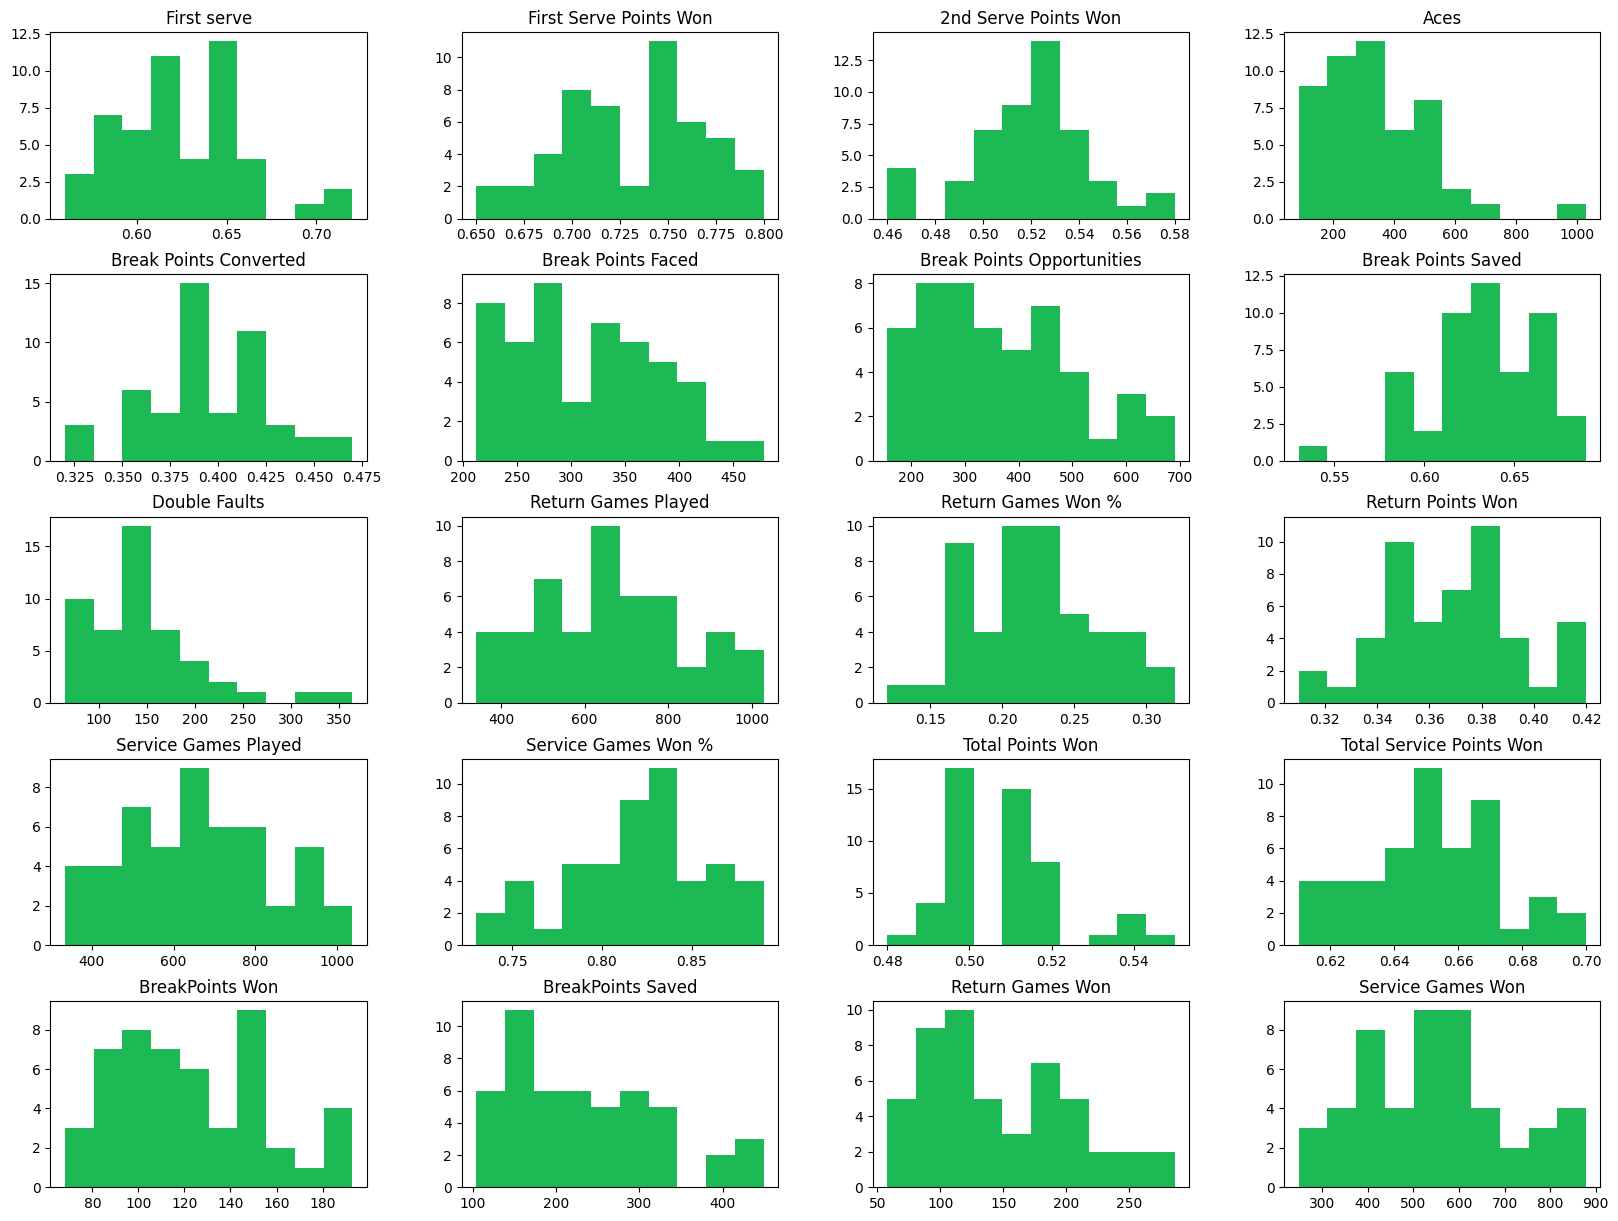

In [ ]:
dfStats.hist(figsize=(20,15),grid=False,color="#1DB954");

In [ ]:
dfStats.describe().round(2)


,First serve,First Serve Points Won,2nd Serve Points Won,Aces,Break Points Converted,Break Points Faced,Break Points Opportunities,Break Points Saved,Double Faults,Return Games Played,Return Games Won %,Return Points Won,Service Games Played,Service Games Won %,Total Points Won,Total Service Points Won,BreakPoints Won,BreakPoints Saved,Return Games Won,Service Games Won
count,50.00,50.00,50.00,50.00,50.00,50.0,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,0.62,0.73,0.52,350.52,0.39,314.0,369.44,0.63,145.14,658.56,0.22,0.37,661.28,0.82,0.51,0.65,123.76,234.30,146.00,545.32
std,0.03,0.04,0.03,174.71,0.03,67.9,135.57,0.03,59.85,173.65,0.04,0.02,176.30,0.04,0.01,0.02,31.84,89.64,58.12,161.64
min,0.56,0.65,0.46,85.00,0.32,212.0,155.00,0.53,65.00,340.00,0.12,0.31,334.00,0.73,0.48,0.61,68.00,104.00,58.00,248.00
25%,0.60,0.71,0.50,230.25,0.37,262.0,256.00,0.61,103.50,530.00,0.19,0.35,525.25,0.80,0.50,0.64,101.25,161.25,98.25,414.75
50%,0.62,0.74,0.52,338.00,0.39,313.5,350.00,0.64,133.50,668.50,0.22,0.37,666.00,0.82,0.51,0.65,119.50,212.00,136.50,534.50
75%,0.64,0.76,0.54,460.50,0.41,365.5,458.50,0.66,164.00,772.75,0.24,0.38,769.25,0.85,0.52,0.67,147.50,293.25,181.50,642.25
max,0.72,0.80,0.58,1031.00,0.47,478.0,691.00,0.69,364.00,1029.00,0.32,0.42,1038.00,0.89,0.55,0.70,193.00,449.00,286.00,879.00


### Análisis bivariante

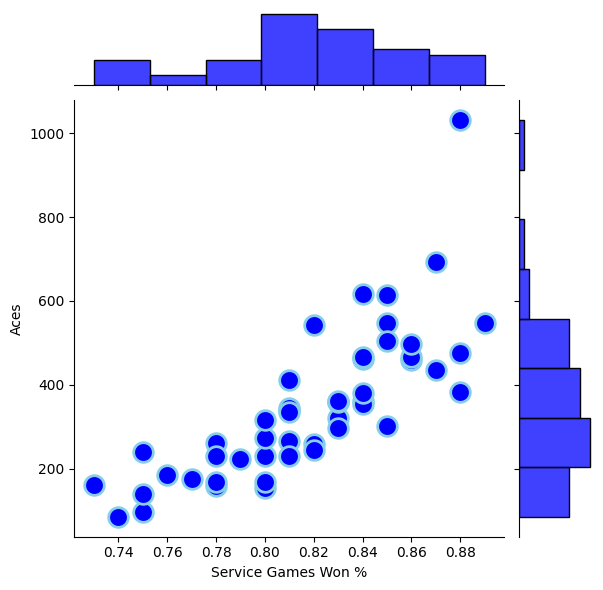

In [92]:
sns.jointplot(x=dfStats["Service Games Won %"], y=dfStats["Aces"], kind='scatter',
              color='blue', edgecolor="skyblue", linewidth=2, s=200)

plt.show();

### Análisis multivariante

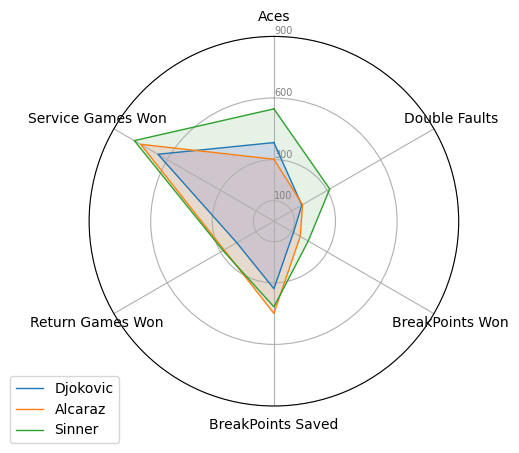

In [93]:
from math import pi

dfStats_values = dfStats.head()[["Player Name","Aces", "Double Faults","BreakPoints Won", "BreakPoints Saved", "Return Games Won", "Service Games Won"]]

# number of variable
categories=list(dfStats_values)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, projection="polar")
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([100,300,600, 900], ["100","300","600", "900"], color="grey", size=7)
plt.ylim(0,900)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=dfStats_values.loc[0].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Djokovic")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=dfStats_values.loc[1].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Alcaraz")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=dfStats_values.loc[2].drop('Player Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Sinner")
ax.fill(angles, values, 'g', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

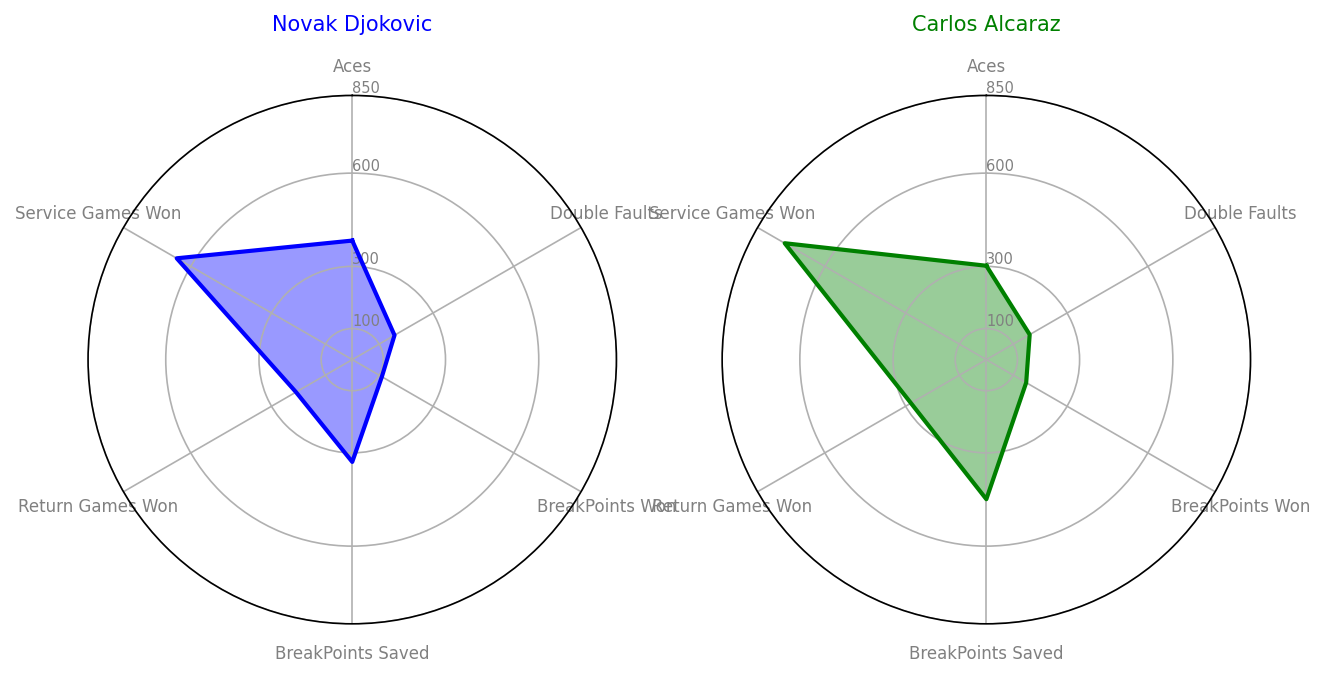

In [94]:
def make_spider( row, title, color):

    # number of variable
    categories=list(dfStats_values)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1,2,row +1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([100,300,600, 850], ["100","300","600", "850"], color="grey", size=7)
    plt.ylim(0,850)

    # Ind1
    values=dfStats_values.loc[row].drop('Player Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=10, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=150
plt.figure(figsize=(1500/my_dpi, 2500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
colores = ["b", "g", "r"]

# Loop to plot
for row in range(0, len(dfStats_values.head(2).index)):
    col = colores[row]
    make_spider( row=row, title=dfStats_values['Player Name'][row],color=col)

In [95]:
# 1. Relacion entre el número de aces y el numero de juegos ganados al saque

df_aces = dfStats["Aces"]
df_DobleFalta = dfStats["Service Games Won"]

correlacion , pv = stats.pearsonr(df_aces, df_DobleFalta)
correlacion, pv


if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre número de aces y el número de servicios ganados"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre número de aces y el número de servicios ganados"


In [ ]:
# 2. Relacion entre el número de DF y el numero de juegos perdidos al saque

df_aces = dfStats["Double Faults"]

df_DobleFalta = dfStats["BreakPoints Saved"]

ttest = stats.ttest_ind(df_aces, df_DobleFalta)


if ttest[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la masa corporal entre sexos de los pingüino"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en la masa corporal entre sexos de los pingüino"


In [ ]:
#4.
variables_num = dfStats.select_dtypes(exclude='object')

shapiro = {var: stats.shapiro(variables_num[var]) for var in variables_num.columns}

for var in variables_num.columns:
    if shapiro[var][1] < 0.05:
        print(f'Rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable {var}"')
    else:
        print(f'No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable {var}"')

No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable First serve"
No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable First Serve Points Won"
No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable 2nd Serve Points Won"
Rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable Aces"
No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable Break Points Converted"
No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable Break Points Faced"
Rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable Break Points Opportunities"
No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable Break Points Saved"
Rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de 